# Compare Feature Selection Methods and Identify Overlapping Features
### Group 33, Florida Atlantic University
- Compare top-ranked features from Fold-Change, Chi-Squared, Information Gain, and Lasso.
- Identify overlapping features across different methods to find consistently important biomarkers.
- Save results for biomarker ranking and downstream analysis.


> Load Feature Selection Results

In [78]:
import pandas as pd
import os
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Define the directory containing results
RESULTS_DIR = "../results"

# Define file paths exactly as in your folder
file_paths = {
    "fold_change": os.path.join(RESULTS_DIR, "fold_change_results.csv"),
    "chi2": os.path.join(RESULTS_DIR, "chi_squared_features.csv"),
    "info_gain": os.path.join(RESULTS_DIR, "information_gain_results.csv"),
    "lasso": os.path.join(RESULTS_DIR, "lasso_results.csv"),
}

# Load available feature selection results
feature_sets = {}

for method, path in file_paths.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        # Special handling for fold change due to column naming
        if method == "fold_change":
            feature_sets[method] = set(df['Unnamed: 0'])
        else:
            feature_sets[method] = set(df['Feature'])
        logging.info(f"Loaded {method} features: {len(feature_sets[method])} features.")
    else:
        logging.warning(f"Missing file: {path}. Skipping {method}.")

print("Feature sets loaded successfully!")

# Define variables for visualization
fold_change_features = feature_sets["fold_change"]
chi2_features = feature_sets["chi2"]
info_gain_features = feature_sets["info_gain"]
lasso_features = feature_sets["lasso"]

print("\nFeature counts:")
print(f"Fold change features: {len(fold_change_features)}")
print(f"Chi-squared features: {len(chi2_features)}")
print(f"Information gain features: {len(info_gain_features)}")
print(f"LASSO features: {len(lasso_features)}")

Feature sets loaded successfully!

Feature counts:
Fold change features: 1882
Chi-squared features: 1637
Information gain features: 1881
LASSO features: 503


> Debugging

In [79]:
print("\nFeature name examples from each method:")
for method, features in feature_sets.items():
    print(f"\n{method} (first 5):")
    features_list = list(features)
    print(features_list[:5])

print("\nFeature format check:")
for method, features in feature_sets.items():
    feature = list(features)[0]  # Get first feature
    print(f"{method}: {feature} (type: {type(feature)})")

# Check for exact overlaps between methods
for method1 in feature_sets:
    for method2 in feature_sets:
        if method1 < method2:  # Avoid duplicate comparisons
            overlap = len(feature_sets[method1] & feature_sets[method2])
            print(f"\nOverlap between {method1} and {method2}: {overlap} features")


Feature name examples from each method:

fold_change (first 5):
['hsa-mir-3135b', 'hsa-mir-124-3', 'hsa-mir-4734', 'hsa-mir-6731', 'hsa-mir-4780']

chi2 (first 5):
['hsa-mir-3135b', 'hsa-mir-124-3', 'hsa-mir-4734', 'hsa-mir-6731', 'hsa-mir-4780']

info_gain (first 5):
['hsa-mir-3135b', 'hsa-mir-124-3', 'hsa-mir-4734', 'hsa-mir-6731', 'hsa-mir-4780']

lasso (first 5):
['hsa-mir-5704', 'hsa-mir-3167', 'hsa-mir-6731', 'hsa-mir-4706', 'hsa-mir-4315-2']

Feature format check:
fold_change: hsa-mir-3135b (type: <class 'str'>)
chi2: hsa-mir-3135b (type: <class 'str'>)
info_gain: hsa-mir-3135b (type: <class 'str'>)
lasso: hsa-mir-5704 (type: <class 'str'>)

Overlap between fold_change and info_gain: 1881 features

Overlap between fold_change and lasso: 503 features

Overlap between chi2 and fold_change: 1636 features

Overlap between chi2 and info_gain: 1636 features

Overlap between chi2 and lasso: 503 features

Overlap between info_gain and lasso: 503 features


> Find Overlapping Features

In [74]:
# Find overlapping features across all four methods
overlapping_features = fold_change_features & chi2_features & info_gain_features & lasso_features

# Display the count and list of overlapping features
print(f"Number of overlapping features: {len(overlapping_features)}")
print("Overlapping features:", overlapping_features)

# Save overlapping features to CSV
overlap_df = pd.DataFrame({'Feature': list(overlapping_features)})
overlap_df.to_csv('../results/overlapping_features.csv', index=False)
print("Overlapping features saved successfully!")
print("\nFirst few overlapping features:")
print(list(overlapping_features)[:5])

Number of overlapping features: 503
Overlapping features: {'hsa-mir-5704', 'hsa-mir-3167', 'hsa-mir-6731', 'hsa-mir-4706', 'hsa-mir-4315-2', 'hsa-mir-6775', 'hsa-mir-3646', 'hsa-mir-4488', 'hsa-mir-4322', 'hsa-mir-7847', 'hsa-mir-549a', 'hsa-mir-3683', 'hsa-mir-4515', 'hsa-mir-4683', 'hsa-mir-521-1', 'hsa-mir-1258', 'hsa-mir-7973-1', 'hsa-mir-3144', 'hsa-mir-1271', 'hsa-mir-663b', 'hsa-mir-1912', 'hsa-mir-4506', 'hsa-mir-491', 'hsa-mir-6826', 'hsa-mir-6126', 'hsa-mir-425', 'hsa-mir-625', 'hsa-mir-372', 'hsa-mir-1252', 'hsa-mir-4432', 'hsa-mir-5006', 'hsa-mir-603', 'hsa-mir-3665', 'hsa-mir-1237', 'hsa-mir-4664', 'hsa-mir-7114', 'hsa-mir-34b', 'hsa-mir-6860', 'hsa-mir-1245a', 'hsa-mir-623', 'hsa-mir-5011', 'hsa-mir-202', 'hsa-mir-4434', 'hsa-mir-8082', 'hsa-mir-548ag-1', 'hsa-mir-133a-2', 'hsa-mir-4519', 'hsa-mir-4694', 'hsa-mir-668', 'hsa-mir-4777', 'hsa-mir-6090', 'hsa-mir-3913-1', 'hsa-mir-6816', 'hsa-mir-6811', 'hsa-mir-3174', 'hsa-mir-3182', 'hsa-mir-4440', 'hsa-mir-548ay', 'hsa-mir

> Filtering Processed Data for Overlapping Features

In [80]:
# Load processed data containing miRNA expression values and target variables
processed_data = pd.read_csv('../processed_data/miRNA_stage_subtype.csv')

# Ensure overlapping features are a list before indexing
overlapping_feature_list = list(overlapping_features)

# Print distribution of target variable before filtering
print("\nTarget variable (stage) distribution before filtering:")
print(processed_data['stage'].value_counts())

# Filter processed data for only the overlapping features
expression_values = processed_data[overlapping_feature_list]
y = processed_data['stage']

# Basic statistics before handling missing values
print("\nDataset statistics before handling missing values:")
print(f"Total samples: {len(processed_data)}")
print(f"Number of features: {len(overlapping_feature_list)}")
print(f"Features with missing values: {expression_values.isnull().any().sum()}")
print(f"Samples with missing values: {expression_values.isnull().any(axis=1).sum()}")

# Check for missing values in features or labels
if expression_values.isnull().values.any() or y.isnull().values.any():
    logging.warning("Missing values detected in features or labels.")
    print("\nMissing values per feature (top 5):")
    missing_counts = expression_values.isnull().sum()
    print(missing_counts[missing_counts > 0].head())
    print(f"\nMissing values in labels: {y.isnull().sum()}")

    # Handle missing values
    expression_values = expression_values.dropna()
    y = y[expression_values.index]  # Keep labels aligned with features

# Validate dataset shapes
print("\nFinal dataset dimensions:")
print(f"Expression values shape: {expression_values.shape}")
print(f"Target labels shape: {y.shape}")

# Show class distribution after filtering
print("\nTarget variable distribution after filtering:")
print(y.value_counts())

# Basic statistics of expression values
print("\nExpression values summary statistics:")
print(expression_values.describe())

# Check feature correlation
print("\nHighly correlated features (correlation > 0.9):")
corr_matrix = expression_values.corr()
high_corr = np.where(np.abs(corr_matrix) > 0.9)
high_corr_pairs = [(overlapping_feature_list[i], 
                    overlapping_feature_list[j], 
                    corr_matrix.iloc[i, j])
                   for i, j in zip(*high_corr) 
                   if i < j]  # avoid duplicate pairs

for feat1, feat2, corr in high_corr_pairs[:5]:  # Show top 5 pairs
    print(f"{feat1} - {feat2}: {corr:.3f}")


Target variable (stage) distribution before filtering:
stage
1    566
2    308
3    175
4     31
0     11
Name: count, dtype: int64

Dataset statistics before handling missing values:
Total samples: 1091
Number of features: 503
Features with missing values: 0
Samples with missing values: 0

Final dataset dimensions:
Expression values shape: (1091, 503)
Target labels shape: (1091,)

Target variable distribution after filtering:
stage
1    566
2    308
3    175
4     31
0     11
Name: count, dtype: int64

Expression values summary statistics:
       hsa-mir-5704  hsa-mir-3167  hsa-mir-6731  hsa-mir-4706  hsa-mir-4315-2  \
count   1091.000000   1091.000000   1091.000000   1091.000000     1091.000000   
mean       0.001775      0.003862      0.147963      0.023799        0.007502   
std        0.022289      0.044681      0.273920      0.099064        0.054849   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000

> Venn Diagram for Feature Overlaps

In [100]:
# Define sets for each feature selection method
sets = {
    "Fold-Change": fold_change_features,
    "Chi-Squared": chi2_features,
    "Information Gain": info_gain_features,
    "LASSO": lasso_features
}

def print_set_summary(set_names):
    print(f"\n--- {', '.join(set_names)} Summary ---")
    print("Set Summary:")
    for name in set_names:
        print(f"  {name}: {len(sets[name])} features")
    
    for i in range(len(set_names)):
        for j in range(i + 1, len(set_names)):
            intersection = sets[set_names[i]] & sets[set_names[j]]
            print(f"  Intersection ({set_names[i]} ∩ {set_names[j]}): {len(intersection)} features")

# Print summaries
methods1 = ["Fold-Change", "Chi-Squared", "Information Gain"]
methods2 = ["Chi-Squared", "Information Gain", "LASSO"]

print_set_summary(methods1)
print_set_summary(methods2)


--- Fold-Change, Chi-Squared, Information Gain Summary ---
Set Summary:
  Fold-Change: 1882 features
  Chi-Squared: 1637 features
  Information Gain: 1881 features
  Intersection (Fold-Change ∩ Chi-Squared): 1636 features
  Intersection (Fold-Change ∩ Information Gain): 1881 features
  Intersection (Chi-Squared ∩ Information Gain): 1636 features

--- Chi-Squared, Information Gain, LASSO Summary ---
Set Summary:
  Chi-Squared: 1637 features
  Information Gain: 1881 features
  LASSO: 503 features
  Intersection (Chi-Squared ∩ Information Gain): 1636 features
  Intersection (Chi-Squared ∩ LASSO): 503 features
  Intersection (Information Gain ∩ LASSO): 503 features


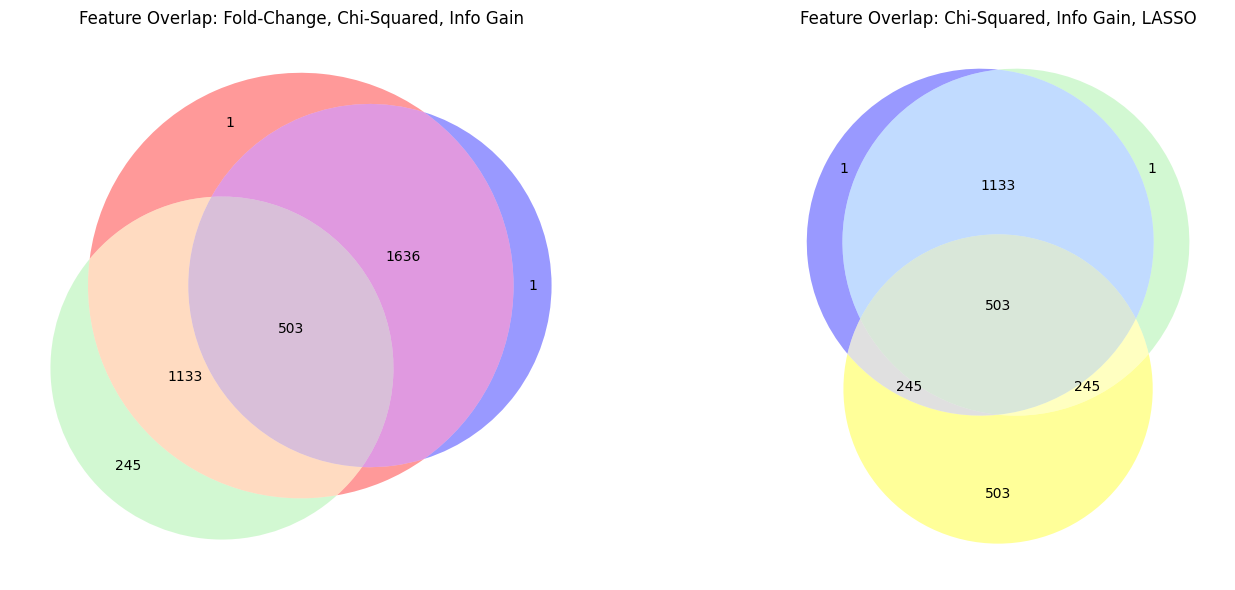

In [104]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(15, 6))

# First Venn diagram
plt.subplot(121)
venn3(subsets=(1, 1, 1636, 245, 1133, 245, 503),
      set_labels=('', '', ''),
      set_colors=('red', 'blue', 'lightgreen'))
plt.title("Feature Overlap: Fold-Change, Chi-Squared, Info Gain")

# Second Venn diagram
plt.subplot(122)
venn3(subsets=(1, 1, 1133, 503, 245, 245, 503),
      set_labels=('', '', ''),
      set_colors=('blue', 'lightgreen', 'yellow'))
plt.title("Feature Overlap: Chi-Squared, Info Gain, LASSO")

plt.tight_layout()
plt.show()